<a href="https://colab.research.google.com/github/johyunkang/adp_certificate/blob/main/stats_textbook_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# chapter5. 정규선형모델


## 5.1 연속형 독립변수가 하나인 모델(단순회귀)

### 5.1.1 분석준비

In [3]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 선형모델을 추정하는 라이브러리(경고가 나올 수 있음)
import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
# bear data 생성
# beer = [45.3, 59.3, 40.4, 38.0, 37.0]
# temp = [20.5, 25.0, 10.0, 26.9, 15.8]

# beer = pd.DataFrame({'beer':beer, 'temp':temp})
beer = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adp/파이썬으로배우는통계학교과서/data/5-1-1-beer.csv')
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


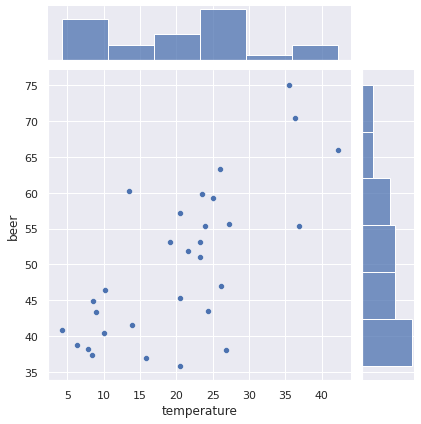

In [7]:
sns.jointplot(x='temperature', y='beer', data=beer)

아래와 같은 맥주 매상 모델을 구축할 것임

$맥주매상 \sim N(\beta_0 + \beta_1 \times 기온, \sigma^2)$

**종속변수**에 맥주매상을, **독립변수**에 기온을 사용한 **정규선형모델**

### 5.1.4 statsmodels를 이용한 모델링

In [10]:
lm_model = smf.ols(formula = 'beer ~ temperature', data=beer).fit()

`sms.ols` 함수를 사용했음. ols 는 Ordinary Least Squares (범용최소제곱법)의 약자

모집단 분포가 정규분포임을 가정했을 때 `최대우도법`의 결과는 `최소제곱법`의 결과와 일치함

모델의 구조를 지정하는 것이 `formual`. "beer ~ temperature"로 지정함으로써 종속변수는 beer, 독립변수가 temperature인 모델을 지정

### 5.1.5 추정 결과 표시와 계수 검정

In [11]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.11e-05
Time:                        02:03:44   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

위 결과에서 두번째 표에 들어있는 **Intercept와 temperature**만 살펴 보겠습니다.

- coef : 계숫값
- std err : 표준오차
- t : t값
- P>|t| : 귀무가설을 `계수의 값이 0` 이라고 했을 때의 p값, 95% 신뢰구간에서 하측신뢰한계와 상측신뢰한계. p값은 매우 작은 탓에 반올림하여 0이 되었음

기온(temperature)에 대한 계수(0.7654)는 유의미하게 0과 다르다고 판단할 수 있음. 양수이므로 기온이 오르면 맥주 매상도 오른다고 판단할 수 있음

### 5.1.6 summary 함수의 출력 내용 설명

- Deep.Variable : 종속변수의 이름. Deep은 Depended의 약자로, 종속변수라는 의미
- Model, Method : 범용최소제곱법을 사용했다는 설명
- Date, Time : 모델을 추정한 일시
- No.Observations : 샘플사이즈
- Df Residuals : 샘플사이즈에서 추정된 파라미터 수를 뺀 것
- Df model : 사용된 독립변수의 수
- Covariance Type : 공분산 타입. 특별히 지정하지 않으면 nonrobust가 됨
- R-squared, Adj. R-squared : 결정계수와 자유도 조정이 끝난 결정계수 (결정계수는 5.1.12절에서 설명)
- F-statistic, Prob (F-statistic) : 분산분석결과. 분산분석은 5.2절에서 설명
- Log-Likelihood : 최대로그우도
- AIC : 아케이케 정보 기준
- BIC : 베이즈 정보기준, 정보기준의 일종이지만 이 책에서는 사용하지 않음

### 5.1.7 AIC를 이용한 모델 선택

독립변수가 1개 뿐이기에 Null 모델의 AIC와 기온이라는 독립변수가 들어간 모델의 AIC를 비교

Null 모델 구축

In [12]:
null_model = smf.ols('beer ~ 1', data=beer).fit()
null_model.aic

227.94194972563105

독립변수가 있는 모델의 AIC

In [13]:
lm_model.aic

208.90902935575437

AIC 계산 방법 복습

AIC = -2 X (최대로그우도 - 추정된 파라미터 수)

In [16]:
# 추정된 모델의 로그우도
print('추정된 모델의 로그우도:', lm_model.llf)

# 사용된 독립변수의 수
print('사용된 독립변수의 수 :', lm_model.df_model)

# 실제로는 절편(B0)도 추정되었기 때문에 1을 더하면 추정된 파라미터 수를 구할 수 있음
aic = -2 * (lm_model.llf - (lm_model.df_model + 1))
print('aic:', aic)

추정된 모델의 로그우도: -102.45451467787719
사용된 독립변수의 수 : 1.0
aic: 208.90902935575437


**중요**

추정된 파라미터 수에는 몇가지 유형이 있음. 이번에는 **장애모수**를 파라미터 수에 포함시키지 않았지만 이를 포함한 AIC를 구하는 경우도 있음

R언어 등 다른 소프트웨어는 장애모수가 포함되어 있기도 함.

AIC는 그 값이 크고 작음에 의미가 있는 지표.

다시 말해 AIC의 절댓값은 의미가 없음. 같은 유형으로 계산된 AIC는 대소관계가 변하지 않기 때문에 모델 선택에 있어 악영향은 없음

다만 **다른 소프트웨어나 라이브러리에서 계산된 AIC와의 비교는 피해야 함**

예를 들면 파이썬으로 구한 AIC와 R로 구한 AIC의 비교는 의미 없음.

### 5.1.9 seaborn을 이용한 회귀직선 그래프 그리기

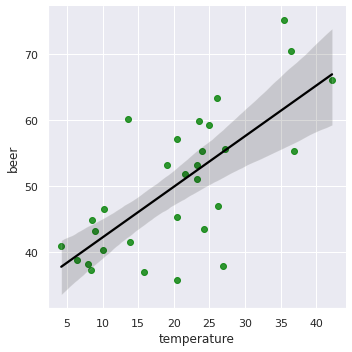

In [20]:
sns.lmplot(x='temperature', y='beer', data=beer , scatter_kws={'color':'green'}, line_kws={'color':'black'})
# 음영 부분은 회귀직선의 95% 신뢰구간을 나타냄

### 5.1.10 모델을 이용한 예측

In [28]:
# predict() 함수에 파라미터를 아무것도 넘기지 않으면 훈련 데이터를 사용한 값이 그대로 출력됨
print(lm_model.predict())

# 기온을 0도 일때의 맥주 매상의 기댓값 계산
print('\n\n기온 0도 일때 맥주매상 기댓값:', lm_model.predict(pd.DataFrame({'temperature':[0]})))

# 0도 일땐 절편(B0)만 있는 것과 같기에 B0 값만 나옴
print('\n\nB0 값(절편):', lm_model.params)

# 기온이 20도일 때의 맥주 매상 기댓값
print('\n\n기온 20도일 때의 맥주매상 기댓값 :', lm_model.predict(pd.DataFrame({'temperature':[20]})))

# 위의 20도 일 때 기대값은 B0 + B1*20 의 계산결과와 같다.
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20

print('\n\n계산결과:', beta0 + beta1 * temperature)

[50.301 53.746 42.264 55.2   46.704 37.825 44.943 54.511 52.445 41.116
 54.664 49.23  53.21  52.445 41.04  52.598 45.25  61.783 55.43  50.301
 42.418 50.301 51.143 40.657 66.911 52.904 62.854 41.423 62.472 39.509]


기온 0도 일때 맥주매상 기댓값: 0    34.610215
dtype: float64


B0 값(절편): Intercept      34.610215
temperature     0.765428
dtype: float64


기온 20도일 때의 맥주매상 기댓값 : 0    49.918767
dtype: float64


계산결과: 49.91876701095054
